<a href="https://colab.research.google.com/github/AhmedAslam28/OIBSIP/blob/main/Carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

#@title  Load the csv file into a DataFrame
df = pd.read_csv('/content/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Getting Dummies

In [5]:
car_data = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'])

In [6]:
X = car_data.drop(['Selling_Price', 'Car_Name'], axis=1) # Removing Car_Name as it is not significant for prediction
y = car_data['Selling_Price']

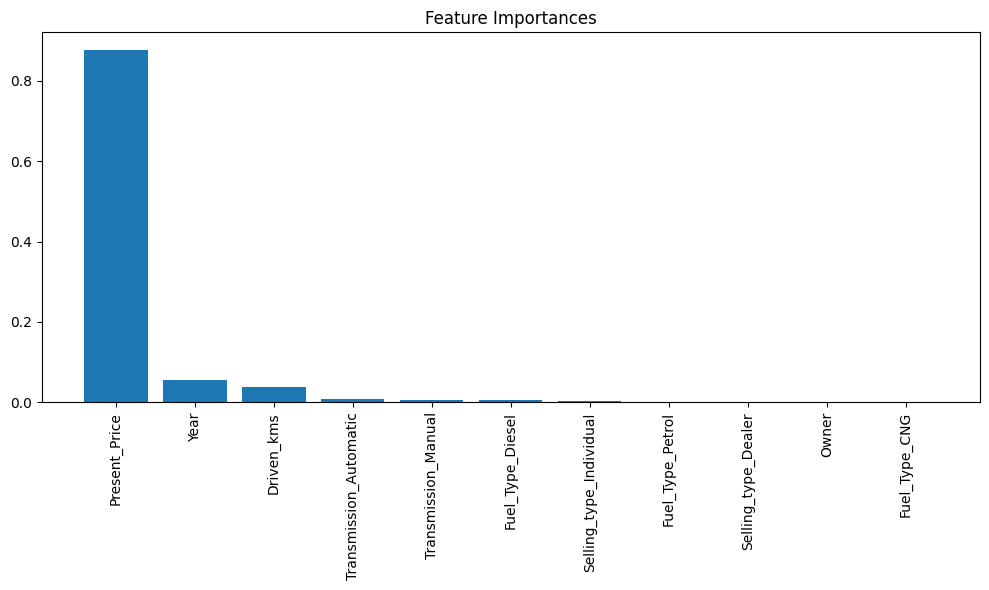

In [13]:
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.tight_layout()
plt.show()

In [7]:
#@title train and text split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#@title Ml Algorithm
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
#@title Making predictions
y_pred = rf_model.predict(X_test)
y_pred

array([ 0.4391, 11.148 ,  4.9025,  0.2084,  7.5995,  6.27  ,  1.1084,
        0.5829,  0.4648,  6.8625,  7.972 ,  1.1008,  8.185 ,  0.4546,
        5.277 ,  2.5675,  1.137 , 14.3223,  0.4657,  1.5445,  0.3248,
        7.9358,  4.7125,  2.7505,  0.4998,  3.4315,  5.3865,  3.147 ,
        1.2052,  1.1643,  0.4118,  9.587 ,  0.4583,  2.5794,  7.8406,
        4.0965,  6.45  ,  6.2227,  2.398 ,  6.907 ,  4.2036,  3.5164,
        4.814 ,  0.5683,  6.0965,  0.7418,  7.9805,  6.9685,  2.86  ,
        3.601 ,  4.925 ,  1.515 , 22.7639, 21.2367,  6.3765, 10.7925,
        5.153 ,  9.3332,  2.6894,  6.716 ,  0.2321])

In [10]:
#@title Evaluate the performance of the model built
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.8130246272131143
R-squared: 0.9647057088350858


In [12]:
correlation_matrix = car_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             Year  Selling_Price  Present_Price  Driven_kms  \
Year                     1.000000       0.236141      -0.047192   -0.524342   
Selling_Price            0.236141       1.000000       0.878914    0.029187   
Present_Price           -0.047192       0.878914       1.000000    0.203618   
Driven_kms              -0.524342       0.029187       0.203618    1.000000   
Owner                   -0.182104      -0.088344       0.008058    0.089216   
Fuel_Type_CNG           -0.017790      -0.025164      -0.011502    0.012223   
Fuel_Type_Diesel         0.064315       0.552339       0.473390    0.172515   
Fuel_Type_Petrol        -0.059959      -0.540571      -0.465326   -0.172874   
Selling_type_Dealer      0.039896       0.550724       0.512121    0.101419   
Selling_type_Individual -0.039896      -0.550724      -0.512121   -0.101419   
Transmission_Automatic  -0.000394       0.367128       0.348776    0.162510   
Transmission_Manual      0.00039

<ipython-input-12-15b78dd248f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_data.corr()
